In [ ]:
!pip install spacy pandas numpy matplotlib
!python -m spacy download en

In [26]:
import spacy
import pandas as pd 
import numpy as np  
import random
from collections import Counter
import matplotlib.pyplot as plt


In [27]:
#Data Exploration 
file_path = '../archive/critic_reviews.csv/caa.csv'
reviews = pd.read_csv(file_path, delimiter=',')
print(reviews.head())


   reviewId                               movieId creationDate  \
0   1913967  16db6b7e-176a-3a45-a31f-158a09f94630   1800-01-01   
1   1906428  29998351-00a7-31ca-b616-6436ffe438e5   1800-01-01   
2   1902262  34bf7e79-d110-3b33-93f5-d1e3b79aea10   1800-01-01   
3   1897051  3aeb7064-f73d-32c1-8432-94babc14e6f1   1800-01-01   
4   1909547  3bd845e8-2e38-3504-9682-45bede2bb83c   1800-01-01   

           criticName                criticPageUrl reviewState  isFresh  \
0  Jonathan Rosenbaum  /critics/jonathan-rosenbaum       fresh     True   
1      Jennie Kermode      /critics/jennie-kermode       fresh     True   
2     Owen Gleiberman     /critics/owen-gleiberman       fresh     True   
3     Owen Gleiberman     /critics/owen-gleiberman       fresh     True   
4                 NaN                          NaN      rotten    False   

   isRotten isRtUrl  isTopCritic        publicationUrl       publicationName  \
0     False   False         True    /critics/source/66        Chicago Re

In [28]:
# Data cleaning
# Extracting the 'quote' column and removing NaN values
quotes = reviews['quote'].dropna()  

print(quotes[:10])
print(len(quotes))


0     Terry Gilliam's third fantasy feature may not ...
2     Weir, working from a script by Rafael Yglesias...
3     Coming out from behind Spike Lee's camera, Ern...
7     Still, despite its heavy mood and intricate pl...
9     It's the sort of film that can only be watched...
10    This enjoyable mixture of wit, low voltage int...
13    A grimly seductive end-of-the-world thriller, ...
15    There aren't many British horror films you cou...
19    It's as effective in 2009 as it was upon its i...
20    When one speaks of The Passion of Joan of Arc,...
Name: quote, dtype: object
85199


In [29]:
# Text Preprocessing
nlp = spacy.load("en_core_web_sm")

def tokens_lemmas_stops(nlp, string):
    doc = nlp(string)
    
    # Extract tokens
    tokens = [token.text for token in doc]
    print(f"Tokens: {tokens}")

    # Extract lemmas
    lemmas = [token.lemma_ for token in doc]
    print(f"Lemmas: {lemmas}")

    # Extract stop words from tokens
    stop_words = [token.text for token in doc if token.is_stop]
    print(f"Stop Words: {stop_words}")

    # Remove stop words from lemmas and form a cleaned string
    cleaned_lemmas = [lemma for lemma in lemmas if lemma not in stop_words]
    core_string = ' '.join(cleaned_lemmas)  # Combine the cleaned lemmas into a string
    
    # Print the cleaned lemmas or fall back to the original lemmas if none are removed
    if core_string.strip():
        print(f"Cleaned Core String: {core_string}")
    else:
        print(f"No stop words removed, Lemmas: {lemmas}")

for q in random.sample(quotes.to_list(), 3):
    tokens_lemmas_stops(nlp, q)
    print("\n\n----------------------------------------------")

Tokens: ['An', 'empty', '-', 'headed', 'bubble', 'of', 'testosterone', 'that', 'explodes', 'in', 'the', 'viewer', "'s", 'face', ',', 'potentially', 'scarring', 'them', 'for', 'the', 'duration', 'of', 'the', 'film', '.']
Lemmas: ['an', 'empty', '-', 'headed', 'bubble', 'of', 'testosterone', 'that', 'explode', 'in', 'the', 'viewer', "'s", 'face', ',', 'potentially', 'scar', 'they', 'for', 'the', 'duration', 'of', 'the', 'film', '.']
Stop Words: ['An', 'empty', 'of', 'that', 'in', 'the', "'s", 'them', 'for', 'the', 'of', 'the']
Cleaned Core String: an - headed bubble testosterone explode viewer face , potentially scar they duration film .


----------------------------------------------
Tokens: ['It', 'won', 'the', 'Grand', 'Jury', 'Prize', 'at', 'the', '2003', 'Sundance', 'Film', 'Festival', ',', 'and', 'it', "'s", 'not', 'hard', 'to', 'see', 'why', '.']
Lemmas: ['it', 'win', 'the', 'Grand', 'Jury', 'Prize', 'at', 'the', '2003', 'Sundance', 'Film', 'Festival', ',', 'and', 'it', 'be', 'no

Top 10 Words Before Stop Word Removal:
[('the', 203), ('a', 154), ('of', 108), ('and', 106), ('it', 76), ('to', 67), ('is', 67), ('in', 44), ('that', 40), ('film', 34)]

Top 10 Words After Stop Word Removal:
[('film', 43), ('movie', 23), ('time', 17), ('like', 13), ('good', 11), ('story', 11), ('director', 8), ('character', 8), ('work', 8), ('bad', 7)]


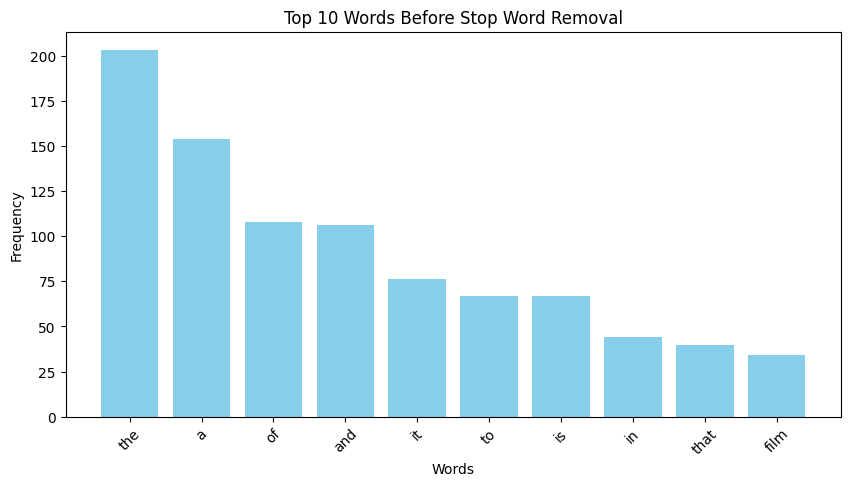

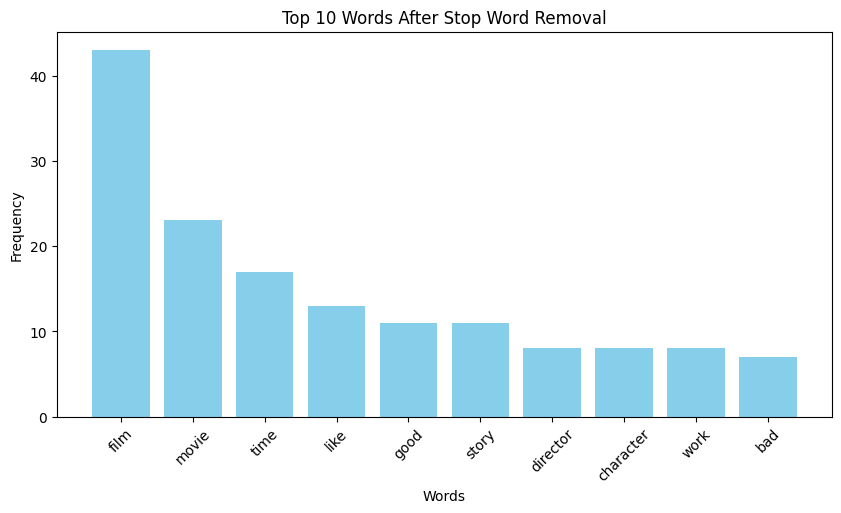

In [30]:
# Join all quotes into a single string for word frequency analysis
all_text = ' '.join(random.sample(quotes.to_list(), 200))

# Process the combined text with Spacy to get tokens
doc = nlp(all_text)

# Count word frequencies before stop word removal
word_freq_before = Counter(token.text.lower() for token in doc if token.is_alpha)

# Count word frequencies after stop word removal
word_freq_after = Counter(token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop)

# Display the top 10 most common words before and after stop word removal
print("Top 10 Words Before Stop Word Removal:")
print(word_freq_before.most_common(10))

print("\nTop 10 Words After Stop Word Removal:")
print(word_freq_after.most_common(10))

# Plotting word frequencies before and after stop word removal
def plot_word_frequencies(freq_dict, title):
    words, counts = zip(*freq_dict.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot top 10 words before and after stop word removal
plot_word_frequencies(word_freq_before, 'Top 10 Words Before Stop Word Removal')
plot_word_frequencies(word_freq_after, 'Top 10 Words After Stop Word Removal')